In [32]:
import pandas as pd
from numpy import median
import numpy as np

In [33]:
team_name="KKR"
team_df=pd.read_csv(f"{team_name}.csv")
final_compare_df = pd.DataFrame()
team_df.head()

,Unnamed: 0,p1,p2,r1,r2,lead,follower,larger_score,total_score,performance
0,0,N Rana,Shubman Gill,12.0,11.0,N Rana,Shubman Gill,12.0,23.0,0.521512
1,1,RA Tripathi,N Rana,8.0,10.0,N Rana,RA Tripathi,10.0,18.0,0.555247
2,2,AD Russell,N Rana,12.5,7.0,AD Russell,N Rana,12.5,19.5,0.640697
3,3,EJG Morgan,N Rana,2.0,2.0,EJG Morgan,N Rana,2.0,4.0,0.498753
4,4,KD Karthik,EJG Morgan,2.0,4.0,EJG Morgan,KD Karthik,4.0,6.0,0.665557


In [34]:
team_df.p1.unique()

array(['N Rana', 'RA Tripathi', 'AD Russell', 'EJG Morgan', 'KD Karthik',
       'Shakib Al Hasan', 'Harbhajan Singh', 'SP Narine', 'PJ Cummins',
       'M Prasidh Krishna', 'VR Iyer', 'TG Southee', 'LH Ferguson'],
      dtype=object)

In [35]:
import networkx as nx
team_df1=team_df.copy()
team_df1['lead']=team_df['follower']
team_df1['follower']=team_df['lead']
team_df1.head()
team_df1=pd.concat([team_df,team_df1])


In [36]:
G_UnDirected=nx.from_pandas_edgelist(team_df1, "follower", "lead", ['performance'])

# get edge weights
_, wt1 = zip(*nx.get_edge_attributes(G_UnDirected, 'performance').items())


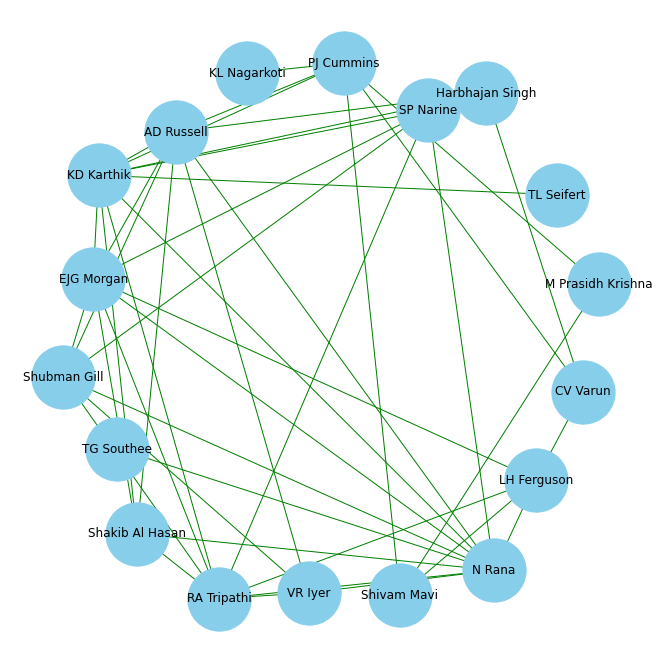

In [37]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_UnDirected, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_UnDirected, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_UnDirected.edges(), edge_color='g')
plt.savefig(f"Graphs/{team_name}/{team_name}_UnDirected.png", format="PNG")
plt.show()

In [38]:
import networkx as nx
# construct graph
G_Directed = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G_Directed, 'performance').items())

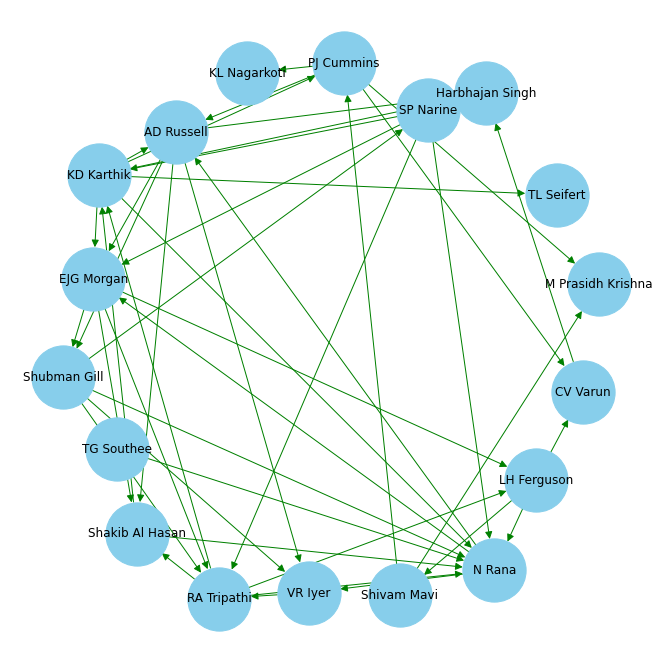

In [39]:
# plot graph
from matplotlib import pyplot as plt
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_Directed, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_Directed, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_Directed.edges(), edge_color='g', arrowsize=15)
plt.savefig(f"Graphs/{team_name}/{team_name}_Directed.png", format="PNG")
plt.show()

# Degree of each node of graph

In [40]:
print("Degree of above Network:")
print(G_Directed.degree(),"\n")
deg=G_Directed.degree()

Degree of above Network:
[('Shubman Gill', 6), ('N Rana', 10), ('RA Tripathi', 8), ('AD Russell', 8), ('EJG Morgan', 8), ('KD Karthik', 9), ('Shakib Al Hasan', 5), ('PJ Cummins', 6), ('Harbhajan Singh', 3), ('CV Varun', 3), ('SP Narine', 5), ('KL Nagarkoti', 1), ('M Prasidh Krishna', 2), ('Shivam Mavi', 3), ('VR Iyer', 4), ('TG Southee', 1), ('LH Ferguson', 5), ('TL Seifert', 1)] 



In [41]:
min_name,min_degree=min(deg,key=lambda deg:deg[1])
s=min_name+": "+str(min_degree)
print(s)
final_compare_df['Min_degree_name']=[min_name]
final_compare_df['Min_degree']=[min_degree]

max_name,max_degree=max(deg,key=lambda deg:deg[1])
s=max_name+": "+str(max_degree)
# print(s)
# final_compare_df['Max_Indegree_name']=[s]
print(s)
final_compare_df['Max_degree_name']=[max_name]
final_compare_df['Max_degree']=[max_degree]


KL Nagarkoti: 1
N Rana: 10


# In-degree of each node of the graph

In [42]:
print(G_Directed.in_degree())


[('Shubman Gill', 2), ('N Rana', 7), ('RA Tripathi', 4), ('AD Russell', 3), ('EJG Morgan', 4), ('KD Karthik', 3), ('Shakib Al Hasan', 3), ('PJ Cummins', 2), ('Harbhajan Singh', 3), ('CV Varun', 2), ('SP Narine', 1), ('KL Nagarkoti', 1), ('M Prasidh Krishna', 2), ('Shivam Mavi', 1), ('VR Iyer', 3), ('TG Southee', 0), ('LH Ferguson', 2), ('TL Seifert', 1)]


In [43]:
indeg=G_Directed.in_degree()
min_name,min_indegree=min(indeg,key=lambda indeg:indeg[1])
s=min_name+": "+str(min_indegree)
# print(s)
final_compare_df['Min_Indegree_name']=[s]

In [44]:

max_name,max_indegree=max(indeg,key=lambda indeg:indeg[1])
s=max_name+": "+str(max_indegree)
# print(s)
final_compare_df['Max_Indegree_name']=[s]



# Out-degree of each node of the graph

In [45]:
print(G_Directed.out_degree())

[('Shubman Gill', 4), ('N Rana', 3), ('RA Tripathi', 4), ('AD Russell', 5), ('EJG Morgan', 4), ('KD Karthik', 6), ('Shakib Al Hasan', 2), ('PJ Cummins', 4), ('Harbhajan Singh', 0), ('CV Varun', 1), ('SP Narine', 4), ('KL Nagarkoti', 0), ('M Prasidh Krishna', 0), ('Shivam Mavi', 2), ('VR Iyer', 1), ('TG Southee', 1), ('LH Ferguson', 3), ('TL Seifert', 0)]


In [46]:
Out=G_Directed.out_degree()
min_name,min_outdegree=min(Out,key=lambda Out:Out[1])
s=min_name+": "+str(min_outdegree)
# print(s)
final_compare_df['Min_Outdegree_name']=[s]

In [47]:
max_name,max_outdegree=max(Out,key=lambda Out:Out[1])
s=max_name+": "+str(max_outdegree)
# print(s)
final_compare_df['Max_Outdegree_name']=[s]



# Normalized Degree Centrality

In [48]:
print(nx.degree_centrality(G_Directed))

{'Shubman Gill': 0.3529411764705882, 'N Rana': 0.5882352941176471, 'RA Tripathi': 0.47058823529411764, 'AD Russell': 0.47058823529411764, 'EJG Morgan': 0.47058823529411764, 'KD Karthik': 0.5294117647058824, 'Shakib Al Hasan': 0.29411764705882354, 'PJ Cummins': 0.3529411764705882, 'Harbhajan Singh': 0.1764705882352941, 'CV Varun': 0.1764705882352941, 'SP Narine': 0.29411764705882354, 'KL Nagarkoti': 0.058823529411764705, 'M Prasidh Krishna': 0.11764705882352941, 'Shivam Mavi': 0.1764705882352941, 'VR Iyer': 0.23529411764705882, 'TG Southee': 0.058823529411764705, 'LH Ferguson': 0.29411764705882354, 'TL Seifert': 0.058823529411764705}


# Closeness Centrality

In [49]:
print(nx.closeness_centrality(G_Directed))

{'Shubman Gill': 0.2920892494929006, 'N Rana': 0.4235294117647059, 'RA Tripathi': 0.32579185520362, 'AD Russell': 0.36828644501278773, 'EJG Morgan': 0.3850267379679144, 'KD Karthik': 0.2920892494929006, 'Shakib Al Hasan': 0.35294117647058826, 'PJ Cummins': 0.2732447817836812, 'Harbhajan Singh': 0.38431372549019605, 'CV Varun': 0.31066176470588236, 'SP Narine': 0.21719457013574664, 'KL Nagarkoti': 0.22593582887700533, 'M Prasidh Krishna': 0.2549019607843137, 'Shivam Mavi': 0.2420168067226891, 'VR Iyer': 0.3850267379679144, 'TG Southee': 0.0, 'LH Ferguson': 0.3137254901960784, 'TL Seifert': 0.23669467787114845}


# Betweenness Centrality 

In [50]:
print(nx.betweenness_centrality(G_Directed,normalized=True))

{'Shubman Gill': 0.05484068627450981, 'N Rana': 0.14399509803921567, 'RA Tripathi': 0.11403186274509805, 'AD Russell': 0.13284313725490196, 'EJG Morgan': 0.14669117647058824, 'KD Karthik': 0.1747549019607843, 'Shakib Al Hasan': 0.06317401960784313, 'PJ Cummins': 0.11948529411764705, 'Harbhajan Singh': 0.0, 'CV Varun': 0.008578431372549019, 'SP Narine': 0.011642156862745097, 'KL Nagarkoti': 0.0, 'M Prasidh Krishna': 0.0, 'Shivam Mavi': 0.03419117647058824, 'VR Iyer': 0.018872549019607842, 'TG Southee': 0.0, 'LH Ferguson': 0.09454656862745098, 'TL Seifert': 0.0}


# Reciprocity

In [51]:
print(nx.reciprocity(G_Directed))

0.0


# Density

In [52]:
print(nx.density(G_Directed))



0.1437908496732026


In [53]:
final_compare_df['Density']=[nx.density(G_Directed)]


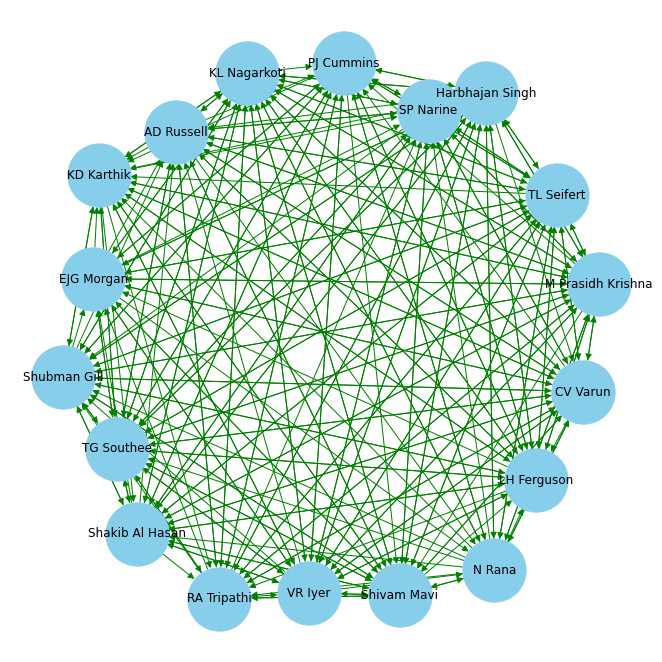

In [54]:
G_C = nx.complement(G_Directed)
# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G_C, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G_C, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G_C.edges(), edge_color='g', arrowsize=13)
plt.savefig(f"Graphs/{team_name}/{team_name}_Complement.png", format="PNG")
plt.show()

# Shortest path lengths between all pairs

In [55]:
shortest_paths=nx.all_pairs_shortest_path_length(G_Directed)
shortest_paths_list=list(shortest_paths)
print(shortest_paths_list)

[('Shubman Gill', {'Shubman Gill': 0, 'N Rana': 1, 'VR Iyer': 1, 'RA Tripathi': 1, 'SP Narine': 1, 'EJG Morgan': 2, 'KD Karthik': 2, 'AD Russell': 2, 'LH Ferguson': 2, 'Shakib Al Hasan': 2, 'TL Seifert': 3, 'Harbhajan Singh': 3, 'PJ Cummins': 3, 'Shivam Mavi': 3, 'CV Varun': 3, 'KL Nagarkoti': 4, 'M Prasidh Krishna': 4}), ('N Rana', {'N Rana': 0, 'EJG Morgan': 1, 'VR Iyer': 1, 'AD Russell': 1, 'Harbhajan Singh': 2, 'LH Ferguson': 2, 'Shubman Gill': 2, 'RA Tripathi': 2, 'Shakib Al Hasan': 2, 'KD Karthik': 3, 'SP Narine': 3, 'Shivam Mavi': 3, 'CV Varun': 3, 'TL Seifert': 4, 'PJ Cummins': 4, 'M Prasidh Krishna': 4, 'KL Nagarkoti': 5}), ('RA Tripathi', {'RA Tripathi': 0, 'LH Ferguson': 1, 'KD Karthik': 1, 'N Rana': 1, 'Shakib Al Hasan': 1, 'TL Seifert': 2, 'EJG Morgan': 2, 'AD Russell': 2, 'Harbhajan Singh': 2, 'PJ Cummins': 2, 'Shivam Mavi': 2, 'VR Iyer': 2, 'CV Varun': 2, 'Shubman Gill': 3, 'KL Nagarkoti': 3, 'M Prasidh Krishna': 3, 'SP Narine': 4}), ('AD Russell', {'AD Russell': 0, 'EJG

# Diameter of the Complemented Undirected Network

In [56]:
print(nx.diameter(G_UnDirected))

4


In [57]:
final_compare_df['Diameter']=[nx.diameter(G_UnDirected)]


# Eccentricty of all the nodes of the Undirected Network


In [58]:
dict_ecc=dict(nx.eccentricity(G_UnDirected))
print(dict_ecc)

{'Shubman Gill': 3, 'N Rana': 3, 'RA Tripathi': 3, 'AD Russell': 2, 'EJG Morgan': 3, 'KD Karthik': 2, 'Shakib Al Hasan': 3, 'PJ Cummins': 3, 'Harbhajan Singh': 3, 'CV Varun': 3, 'SP Narine': 3, 'KL Nagarkoti': 4, 'M Prasidh Krishna': 4, 'Shivam Mavi': 3, 'VR Iyer': 3, 'TG Southee': 4, 'LH Ferguson': 3, 'TL Seifert': 3}


# Implementing the Girvan-Newman Algorithm for Community Detection in Python

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg


# find communities in the graph
c = girvan_newman(G_UnDirected.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

print(node_groups)  #printing the communities in the form of lists

[['TL Seifert', 'N Rana', 'EJG Morgan', 'KD Karthik', 'AD Russell', 'LH Ferguson', 'TG Southee', 'Harbhajan Singh', 'Shubman Gill', 'RA Tripathi', 'SP Narine', 'VR Iyer', 'CV Varun', 'Shakib Al Hasan'], ['KL Nagarkoti', 'M Prasidh Krishna', 'PJ Cummins', 'Shivam Mavi']]


# Plotting the communities

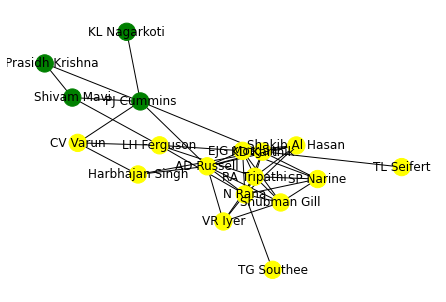

In [60]:
color_map = []
for node in G_UnDirected:
    if node in node_groups[0]:
        color_map.append('yellow')
    else: 
        color_map.append('green') 

nx.draw(G_UnDirected, node_color=color_map, with_labels=True)
plt.savefig(f"Graphs/{team_name}/{team_name}_Community.png", format="PNG")
plt.show()

# Clustering 

In [61]:
import networkx as nx

# returns a Dictionary with clustering value of each node
print(nx.clustering(G_UnDirected))
 
# This returns clustering value of specified node
print("\nN Rana:",nx.clustering(G_UnDirected, 'N Rana'))

{'Shubman Gill': 0.7333333333333333, 'N Rana': 0.4666666666666667, 'RA Tripathi': 0.5714285714285714, 'AD Russell': 0.42857142857142855, 'EJG Morgan': 0.6428571428571429, 'KD Karthik': 0.3888888888888889, 'Shakib Al Hasan': 0.9, 'PJ Cummins': 0.13333333333333333, 'Harbhajan Singh': 0.3333333333333333, 'CV Varun': 0, 'SP Narine': 0.9, 'KL Nagarkoti': 0, 'M Prasidh Krishna': 1.0, 'Shivam Mavi': 0.3333333333333333, 'VR Iyer': 0.8333333333333334, 'TG Southee': 0, 'LH Ferguson': 0.3, 'TL Seifert': 0}

N Rana: 0.4666666666666667


# Graph connectivity measures

In [62]:
print(nx.is_connected(G_UnDirected))
 
# returns number of different connected components
print(nx.number_connected_components(G_UnDirected))
 
# returns list of nodes in different connected components
print(list(nx.connected_components(G_UnDirected)))
 
# returns list of nodes of component containing given node
print(nx.node_connected_component(G_UnDirected, 'N Rana'))
 
# returns number of nodes to be removed so that Graph becomes disconnected
print(nx.node_connectivity(G_UnDirected))
 
# returns number of edges to be removed so that Graph becomes disconnected
print(nx.edge_connectivity(G_UnDirected))

True
1
[{'TL Seifert', 'N Rana', 'EJG Morgan', 'KD Karthik', 'AD Russell', 'LH Ferguson', 'TG Southee', 'Harbhajan Singh', 'Shubman Gill', 'RA Tripathi', 'SP Narine', 'PJ Cummins', 'KL Nagarkoti', 'Shivam Mavi', 'VR Iyer', 'CV Varun', 'Shakib Al Hasan', 'M Prasidh Krishna'}]
{'TL Seifert', 'KD Karthik', 'N Rana', 'EJG Morgan', 'KL Nagarkoti', 'AD Russell', 'LH Ferguson', 'TG Southee', 'Harbhajan Singh', 'Shubman Gill', 'RA Tripathi', 'SP Narine', 'PJ Cummins', 'Shivam Mavi', 'VR Iyer', 'CV Varun', 'Shakib Al Hasan', 'M Prasidh Krishna'}
1
1


# Modularity of the graph

In [63]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G_UnDirected, node_groups))
print(nx_comm.modularity(G_UnDirected, nx_comm.label_propagation_communities(G_UnDirected)))

0.14462809917355376
0.14462809917355376


In [64]:
final_compare_df['Modularity']= nx_comm.modularity(G_UnDirected, node_groups)


In [65]:
# !pip install --upgrade scipy networkx

# Pagerank

In [66]:
import networkx as nx
pr1 = nx.pagerank(G_UnDirected, 1) # component of vector x = 1
pr2 = nx.pagerank(G_UnDirected, 0.5)  # component of vector x = 0.5
# print(pr1)
s1="Node " +str(max(pr1))+" = "+ str(pr1[max(pr1)])
print(s1)
s2="Node " +str(max(pr2))+" = "+ str(pr2[max(pr2)])
# print(pr2)
print(s2)


Node VR Iyer = 0.04545227081648875
Node VR Iyer = 0.04534771923430149


In [67]:
final_compare_df['Page Rank(x=1)']=s1
final_compare_df['Page Rank(x=0.5)']=s2
print(final_compare_df.T)

                                                     0
Min_degree_name                           KL Nagarkoti
Min_degree                                           1
Max_degree_name                                 N Rana
Max_degree                                          10
Min_Indegree_name                        TG Southee: 0
Max_Indegree_name                            N Rana: 7
Min_Outdegree_name                  Harbhajan Singh: 0
Max_Outdegree_name                       KD Karthik: 6
Density                                       0.143791
Diameter                                             4
Modularity                                    0.144628
Page Rank(x=1)      Node VR Iyer = 0.04545227081648875
Page Rank(x=0.5)    Node VR Iyer = 0.04534771923430149


In [68]:

final_compare_df.to_csv(f"Graphs/{team_name}/{team_name}.csv")